### 1. 回顾
通过上节我们学到了：
1. 增加特征值在一定程度上提高了精度，但是将应用所有的特征值并不一定提高精度
2. 选择合适的特征值，对于模型的准确性非常重要

在上次任务中，我们提到，提高模型的精度有两种方式:
1. 增加特征值
2. 增加K值（近邻Neighbors）

In [1]:
# 读取 训练集和测试集
import pandas as pd 
import numpy as np
train_df = pd.read_csv('dc_airbnb_train.csv')
test_df = pd.read_csv('dc_airbnb_test.csv')

In [2]:
train_df.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,-0.596544,-0.249467,-0.439151,-0.546858,125.0,-0.341375,-0.016604,4.579650
1,-0.596544,-0.249467,0.412923,-0.546858,85.0,-0.341375,-0.016603,1.159275
2,-1.095499,-0.249467,-1.291226,-0.546858,50.0,-0.341375,-0.016573,-0.482505
3,-0.596544,-0.249467,-0.439151,-0.546858,209.0,0.487635,-0.016584,-0.448301
4,4.393004,4.507903,1.264998,2.829956,215.0,-0.065038,-0.016553,0.646219


In [3]:
test_df.head()

,accommodates,bedrooms,bathrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews
0,-0.596544,-1.438810,-0.439151,-0.546858,105.0,-0.341375,-0.016548,-0.243079
1,0.900320,0.939875,1.264998,0.297345,309.0,0.487635,-0.016594,-0.243079
2,-0.596544,-0.249467,2.117072,-0.546858,55.0,-0.341375,-0.016573,0.714626
3,-0.596544,-0.249467,-0.439151,-0.546858,180.0,-0.341375,-0.016573,-0.448301
4,-0.596544,-0.249467,-0.439151,-0.546858,130.0,-0.341375,-0.016573,-0.448301


### 2. 超参数调优
当我们变换选择的特征值时， 我们在影响模型使用的数据维度；另外一方面，当我们变换K值时，我们在影响模型的性能；

那些模型表现和性能的参数，我们叫做超参数(hyperparameters); 找出超参数的过程叫做超参数调优（hyperparameter optimization）

一个简单但是常用的方式(网格搜素)是:

+ 1. 选择一些可能的超参数子集 
+ 2. 使用这些子集的元素训练模型
+ 3. 计算模型的准确度
+ 4. 选择产生误差最小的参数

网格搜索最终成为通过选择K值来评价模型的表现；grid search 可能需要的时间非常长



In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def process_model(k=5, features=[]):
# 1. 选择对应的算法模型，初始化模型对象
    knn = KNeighborsRegressor(algorithm='brute', n_neighbors=k)
    # 2. 选择训练集和测试集
    target = ['price']
    knn.fit(train_df[features], train_df[target])
    predictions = knn.predict(test_df[features])
    mse = mean_squared_error(test_df[target], predictions)
    rmse = np.sqrt(mse)
    value = (k, mse)
    return  value

In [5]:
from itertools import combinations
def gen_combine(features):
    feature_groups = []
    l = range(0, len(features))
    for i in l:
        for each in combinations(l, i+1):
            f = [features[j] for j in each]
            if f and f not in feature_groups:
                feature_groups.append(f)
    return feature_groups


            

In [13]:
ks = [k for k in range(1, 20)]
features = ['accommodates',
 'bedrooms',
 'bathrooms',
 'beds',
 'minimum_nights',
 'maximum_nights',]

feature_groups = gen_combine(features)
data = []
for fg in feature_groups:
    mses = [process_model(k, fg) for k in ks]
    mse_df = pd.DataFrame(data=mses, columns=['k', 'mse'])
    each = mse_df.sort_values('mse').head(1).to_dict(orient='records')
    each = each[0]
    each.update({'features': fg})
    data.append(each)
    
ddf = pd.DataFrame(data=data)
ddf = ddf[['k', 'mse', 'features']]
ddf.sort_values('mse').head(1)


,k,mse,features
42,5,13132.744892,"[accommodates, bedrooms, bathrooms, minimum_ni..."


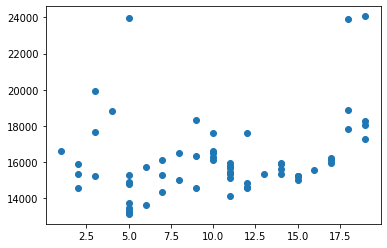

In [15]:
import matplotlib.pyplot as plt 

plt.scatter(ddf.k, ddf.mse)

plt.show()

In [31]:
from itertools import combinations

l = [1, 2, 3, 4]
for i in range(1, len(l)+1):
    for each in combinations(l, i):
        print(list(each))

[1]
[2]
[3]
[4]
[1, 2]
[1, 3]
[1, 4]
[2, 3]
[2, 4]
[3, 4]
[1, 2, 3]
[1, 2, 4]
[1, 3, 4]
[2, 3, 4]
[1, 2, 3, 4]
